In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_hotelbooking = pd.read_csv('hotel_bookings.csv') 

In [14]:
df = df_hotelbooking

# Data Cleaning

In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
# Replace missing values with a default value (e.g. 0)
df.fillna(0, inplace=True)

In [17]:
# Remove irrelevant columns
df.drop(['company'], axis=1, inplace=True)

In [18]:
# Convert data type of a column
#df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [19]:
# Standardize column names
df.rename(columns={'children': 'num_children'}, inplace=True)

In [20]:
# Detect outliers in a column
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['adr'] < Q1 - 1.5 * IQR) | (df['adr'] > Q3 + 1.5 * IQR)

# Replace outliers with a default value (e.g. median)
df.loc[outliers, 'adr'] = df['adr'].median()

In [21]:
# Remove leading/trailing spaces from string columns
df['country'] = df['country'].str.strip()

In [22]:
# Replace inconsistent values in a column
df['market_segment'] = df['market_segment'].replace('Undefined', 'Other')


In [23]:
# Remove special characters from string columns
df['reserved_room_type'] = df['reserved_room_type'].str.replace('/', '')

In [24]:
# Convert the date columns to datetime format
#df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [25]:
#df


# EDA

In [26]:
# print the first 5 rows of the dataset
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0        

In [27]:
# get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  num_children                    87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [28]:
# check for missing values
print(df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
num_children                        0
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [29]:
# get descriptive statistics for the numerical variables
print(df.describe())

        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   

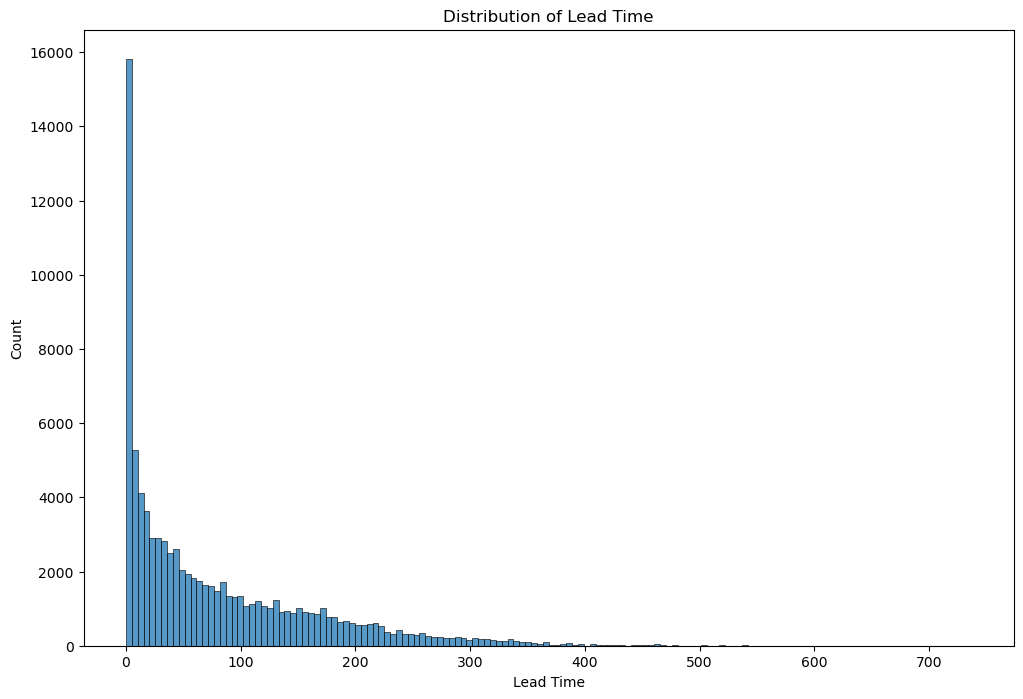

In [30]:
# visualize the distribution of numerical variables
plt.figure(figsize=(12,8))
sns.histplot(df['lead_time'])
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.show()

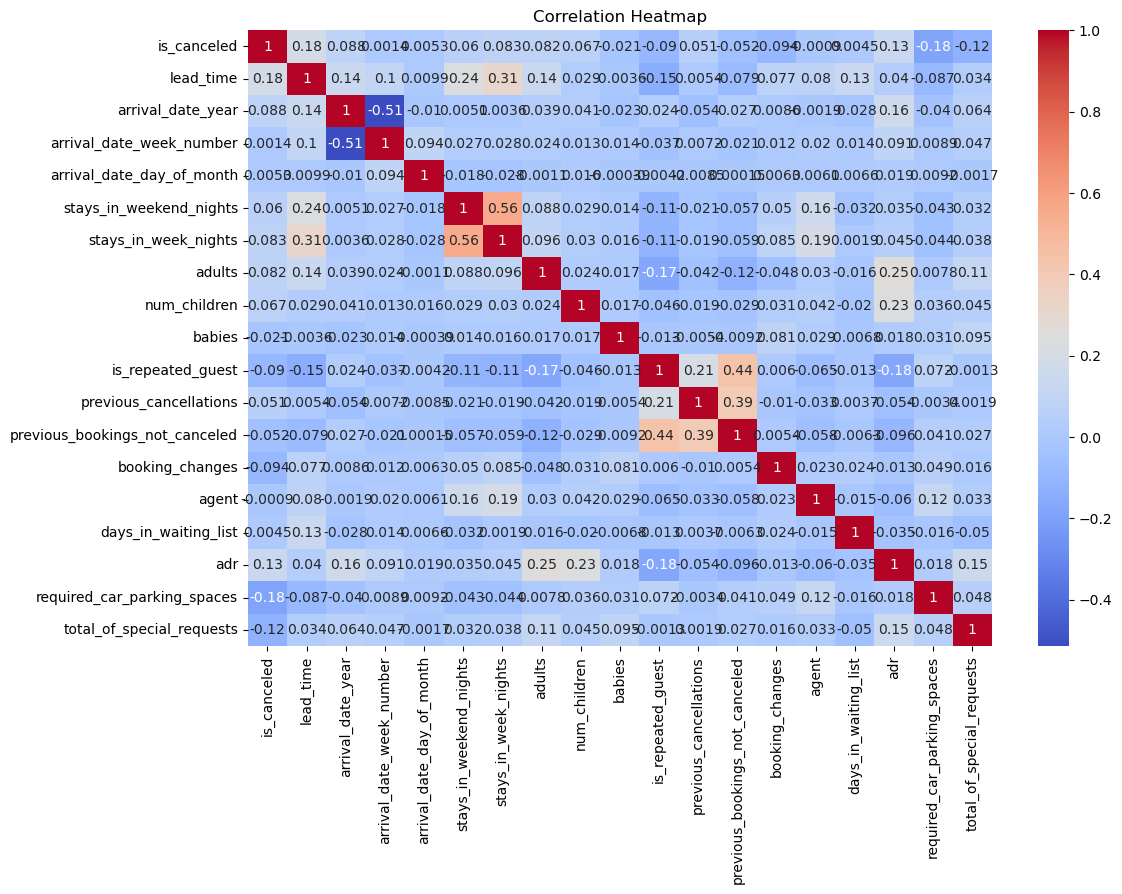

In [31]:
# visualize the correlation between numerical variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

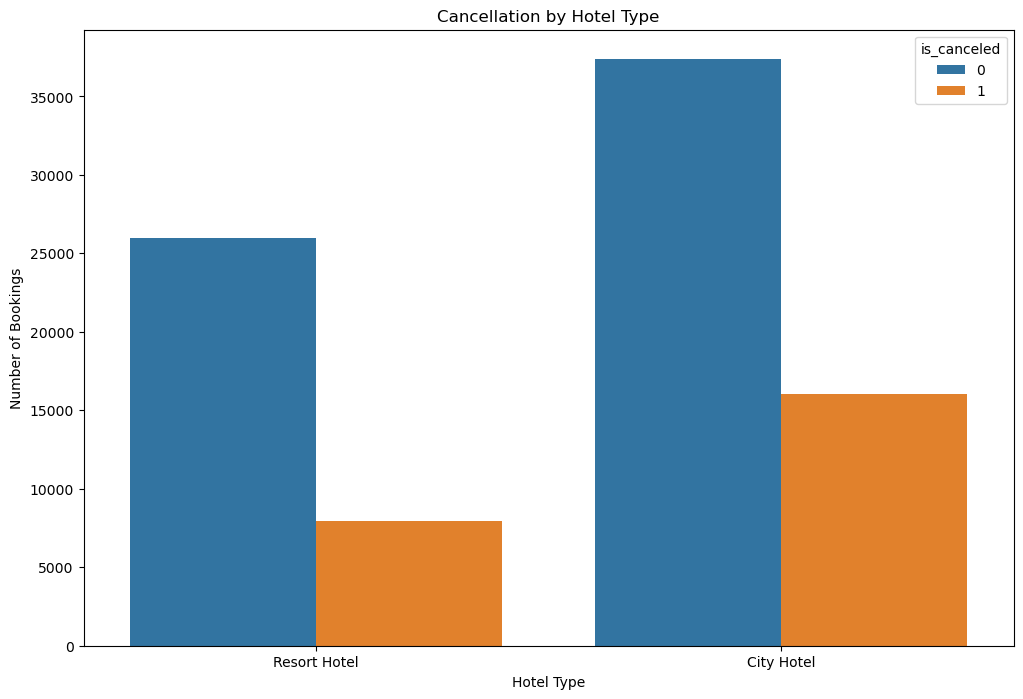

In [32]:
# explore the distribution of categorical variables
plt.figure(figsize=(12,8))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

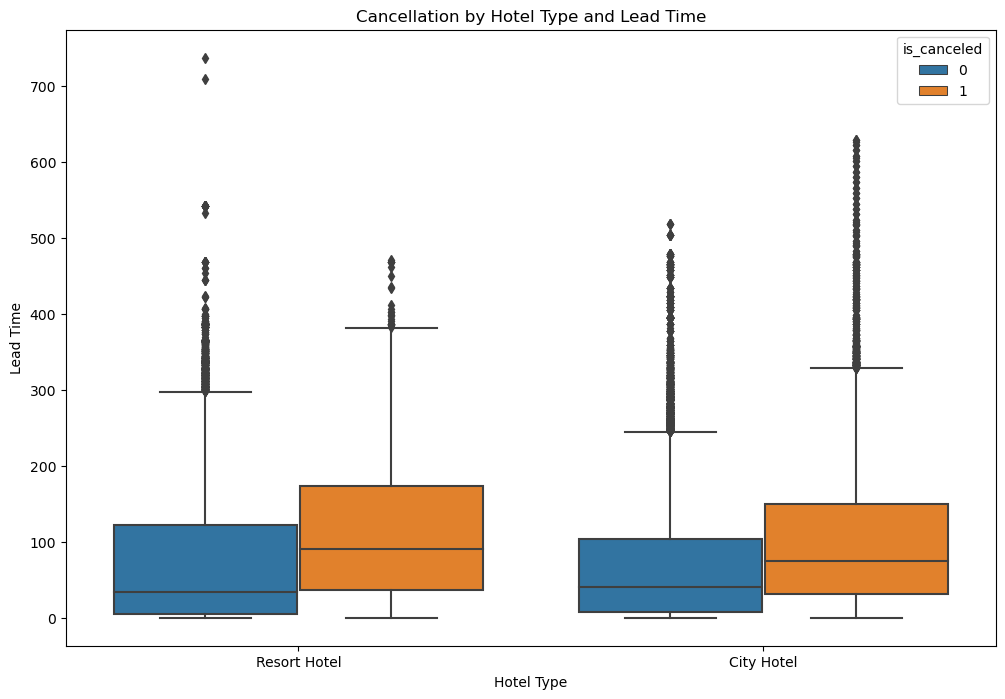

In [33]:
# explore the relationship between categorical and numerical variables
plt.figure(figsize=(12,8))
sns.boxplot(x='hotel', y='lead_time', hue='is_canceled', data=df)
plt.title('Cancellation by Hotel Type and Lead Time')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.show()

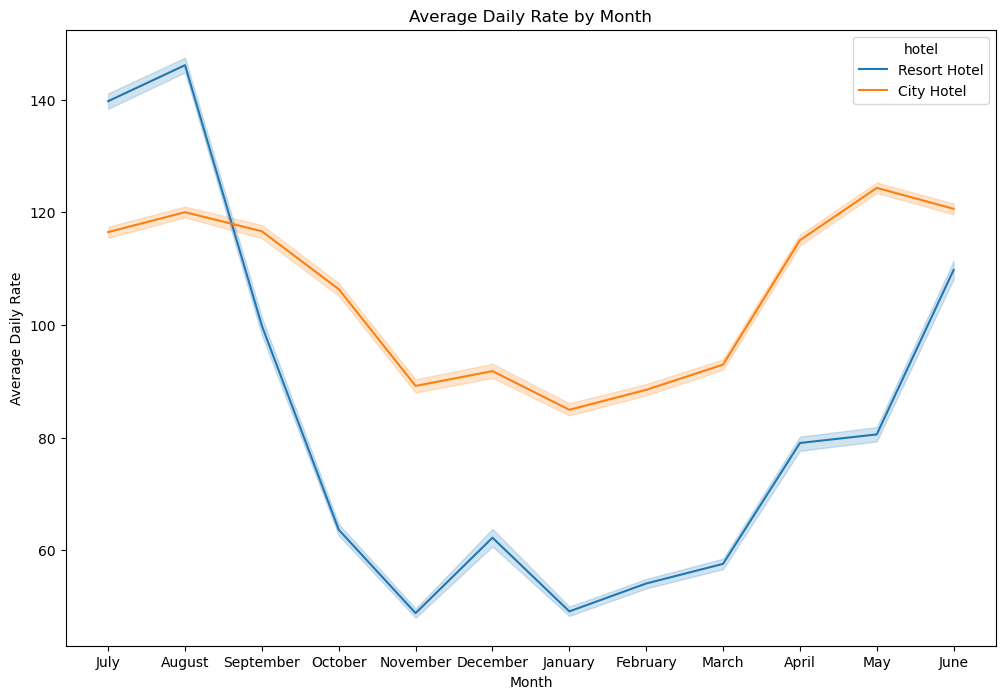

In [34]:
# explore the average daily rate of the bookings
plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df)
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.show()

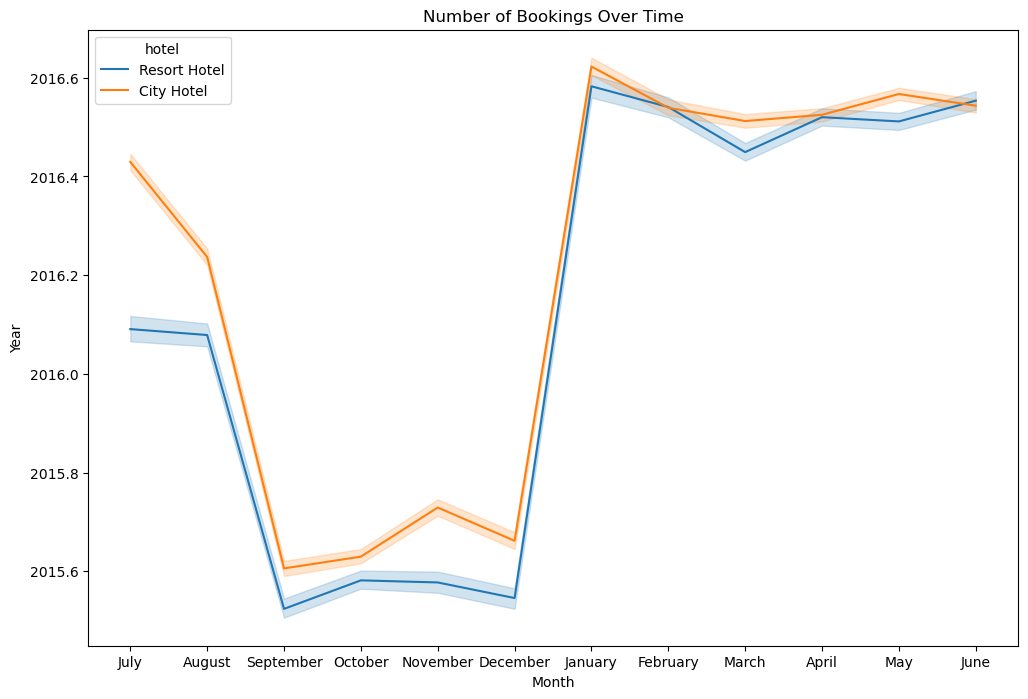

In [35]:
# explore the number of bookings over time
plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_date_month', y='arrival_date_year', hue='hotel', data=df)
plt.title('Number of Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### **Model Training: KNN Cancelation prediction**

In [36]:
df['hotel'] = df['hotel'].map({"Resort Hotel" :1, "City Hotel":0})

In [37]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [38]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder=LabelEncoder()
dict_df={}
for feature in df.columns:
    dict_df[feature]=encoder.fit_transform(df[feature])
#converting back the encoded feature into dataframe
df=pd.DataFrame(dict_df)

In [41]:
df['arrival_date_month'].unique()


array([ 5,  1, 11, 10,  9,  2,  4,  3,  7,  0,  8,  6])

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [44]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.0,0.0,0.715481,0.0,0.454545,0.5,0.0,0.0,0.000000,0.153846,...,0.15,0.0,0.000000,0.0,0.666667,0.000123,0.0,0.0,0.5,0.130811
1,1.0,0.0,1.000000,0.0,0.454545,0.5,0.0,0.0,0.000000,0.153846,...,0.20,0.0,0.000000,0.0,0.666667,0.000123,0.0,0.0,0.5,0.130811
2,1.0,0.0,0.014644,0.0,0.454545,0.5,0.0,0.0,0.029412,0.076923,...,0.00,0.0,0.000000,0.0,0.666667,0.262150,0.0,0.0,0.5,0.131892
3,1.0,0.0,0.027197,0.0,0.454545,0.5,0.0,0.0,0.029412,0.076923,...,0.00,0.0,0.663664,0.0,0.666667,0.262150,0.0,0.0,0.5,0.131892
4,1.0,0.0,0.029289,0.0,0.454545,0.5,0.0,0.0,0.058824,0.153846,...,0.00,0.0,0.522523,0.0,0.666667,0.433849,0.0,0.2,0.5,0.132973


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df_new = df[['hotel','is_canceled','lead_time','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','num_children','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','days_in_waiting_list','adr','required_car_parking_spaces']]

In [47]:
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,num_children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces
0,1.0,0.0,0.715481,0.454545,0.0,0.0,0.000000,0.153846,0.0,0.0,0.0,0.0,0.0,0.222222,0.181818,0.15,0.0,0.0,0.000123,0.0
1,1.0,0.0,1.000000,0.454545,0.0,0.0,0.000000,0.153846,0.0,0.0,0.0,0.0,0.0,0.222222,0.181818,0.20,0.0,0.0,0.000123,0.0
2,1.0,0.0,0.014644,0.454545,0.0,0.0,0.029412,0.076923,0.0,0.0,0.0,0.0,0.0,0.000000,0.181818,0.00,0.0,0.0,0.262150,0.0
3,1.0,0.0,0.027197,0.454545,0.0,0.0,0.029412,0.076923,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.262150,0.0
4,1.0,0.0,0.029289,0.454545,0.0,0.0,0.058824,0.153846,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.433849,0.0


In [48]:
y=df_new['is_canceled']
x = df_new.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [49]:
y_train

62793    0.0
4741     1.0
45924    1.0
46563    1.0
20512    0.0
        ... 
54304    0.0
497      0.0
85177    0.0
53234    0.0
35023    0.0
Name: is_canceled, Length: 61177, dtype: float64

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)


C:\Users\Rohith Ramichetty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [179]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report

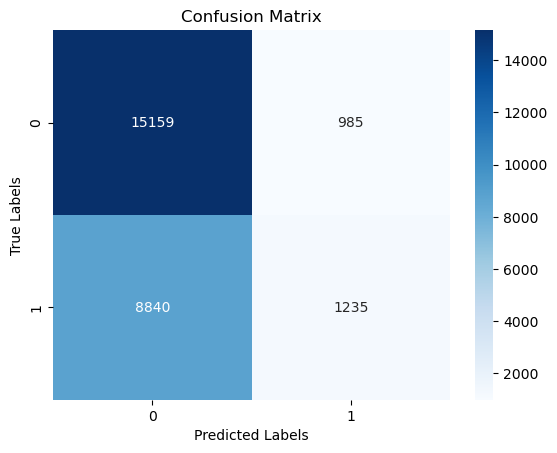

              precision    recall  f1-score   support

           0       0.63      0.94      0.76     16144
           1       0.56      0.12      0.20     10075

    accuracy                           0.63     26219
   macro avg       0.59      0.53      0.48     26219
weighted avg       0.60      0.63      0.54     26219



In [180]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

In [181]:
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))

accuracy_score:0.6252717494946413


### **cleaned dataset**

In [99]:
df_cleaned = pd.read_csv('hotel_bookings.csv') 

In [100]:
df_cleaned.drop_duplicates(inplace=True)

In [101]:
df_cleaned.fillna(0, inplace=True)

In [102]:
df_cleaned.drop(['company'], axis=1, inplace=True)

In [103]:
df_cleaned.rename(columns={'children': 'num_children'}, inplace=True)

In [104]:
df_cleaned['country'] = df_cleaned['country'].str.strip()

In [105]:
df_cleaned['market_segment'] = df_cleaned['market_segment'].replace('Undefined', 'Other')


In [106]:
df_cleaned['reserved_room_type'] = df_cleaned['reserved_room_type'].str.replace('/', '')

In [107]:
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [108]:
encoder=LabelEncoder()
dict_df_clean={}
for feature in df_cleaned.columns:
    dict_df_clean[feature]=encoder.fit_transform(df_cleaned[feature])
#converting back the encoded feature into dataframe
df_cleaned=pd.DataFrame(dict_df_clean)

In [109]:
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,0,5,26,0,0,0,2,...,3,0,0,0,2,1,0,0,1,121
1,1,0,478,0,5,26,0,0,0,2,...,4,0,0,0,2,1,0,0,1,121
2,1,0,7,0,5,26,0,0,1,1,...,0,0,0,0,2,2136,0,0,1,122
3,1,0,13,0,5,26,0,0,1,1,...,0,0,221,0,2,2136,0,0,1,122
4,1,0,14,0,5,26,0,0,2,2,...,0,0,174,0,2,3535,0,1,1,123


In [110]:
df_cleaned['days_in_waiting_list'].unique()

array([  0,  49,  46,  63, 101,  71,  90, 105, 102,  14,  58,  33,  89,
        22, 100,  59,  38,   5,   1,   8,  92,  42,  50,   2,  11, 103,
        97,  13,  43,  86,  77,   4,  96,  18,  20, 116,  84,  94,   6,
        36,  91, 106,  62,  88,  37,  47,  32,  73,  21,  75,  57,  39,
        56,  81,  51,  48,  65,  80,  82,  55,  95,  74,  87,  79,  61,
        15,   3,  40, 122,  30,  54, 117, 113,  67,  53,  85, 123, 124,
       119, 120, 107,  99,  29,  31,  27,  60,  24,  93, 104, 126,  66,
        34, 114, 125, 121, 111, 108, 127,  64, 118,  10,  72,  16,  28,
         9, 109,  17,  25,  45,   7,  78, 112, 115,  23,  98,  12,  52,
        26,  69,  44,  19,  41,  68,  76,  83,  70, 110,  35], dtype=int64)

### days in waitlist -- Logistic Regression

In [111]:
df_logistic = df_cleaned

In [112]:
df_logistic = df_cleaned[['hotel','lead_time','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','days_in_waiting_list','adr','required_car_parking_spaces']]

In [113]:
df_logistic.loc[df_logistic['days_in_waiting_list'] != 0, 'days_in_waiting_list'] = 1

In [114]:
df_logistic['days_in_waiting_list'].unique()

array([0, 1], dtype=int64)

In [115]:
y=df_logistic['days_in_waiting_list']
x = df_logistic.drop('days_in_waiting_list', axis = 1)
x_log_train, X_test, y_log_train, y_test = train_test_split(x, y, test_size = 0.30)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr_model = LogisticRegression()

# Train the logistic regression model
lr_model.fit(x_log_train, y_log_train)
y_pred=lr_model.predict(X_test)
# Get the coefficients and feature names
coef = lr_model.coef_[0]
features = x.columns

C:\Users\Rohith Ramichetty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))


accuracy_score:0.9897784049734925


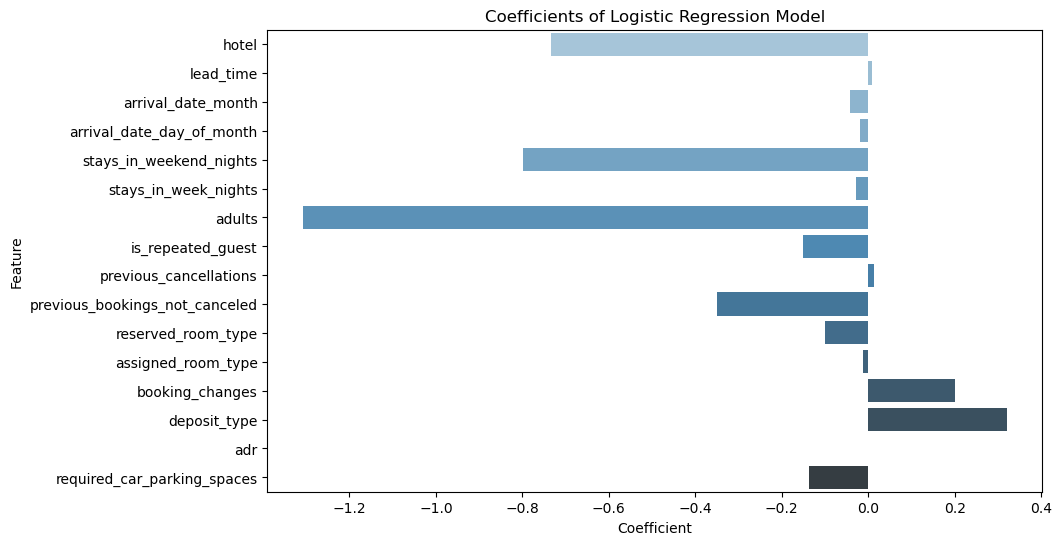

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25969
           1       0.00      0.00      0.00       250

    accuracy                           0.99     26219
   macro avg       0.50      0.50      0.50     26219
weighted avg       0.98      0.99      0.99     26219



In [119]:
# Visualize the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x=coef, y=features, palette='Blues_d')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

### Cancellation after waitlist prediction: naive bayes

In [147]:
df_nb = df_cleaned

In [148]:
df_nb = df_cleaned[['hotel','is_canceled','lead_time','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','babies','num_children','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','deposit_type','days_in_waiting_list','adr','required_car_parking_spaces']]

In [149]:
df_nb = df_nb[df['days_in_waiting_list'] != 0]

C:\Users\Rohith Ramichetty\AppData\Local\Temp\ipykernel_4908\1540138836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nb = df_nb[df['days_in_waiting_list'] != 0]


In [150]:
df_nb.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,num_children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces
2272,1,0,95,10,16,2,6,2,0,0,0,0,0,0,0,0,0,0,606,0
2486,1,0,154,10,29,0,2,2,0,0,0,0,0,0,0,0,0,0,264,0
2487,1,0,25,10,29,0,2,2,0,0,0,0,0,0,0,0,0,0,1069,0
2488,1,0,3,10,29,0,2,2,0,0,0,0,0,0,3,0,0,0,474,1
2490,1,0,13,10,29,0,2,2,1,0,0,0,0,4,4,1,0,0,2197,0


In [155]:
y=df_nb['is_canceled']
x = df_nb.drop('is_canceled', axis = 1)
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# assuming xtrain and ytrain are your training data and labels, respectively
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# assuming xtest is your test data
y_pred = nb_classifier.predict(X_test)


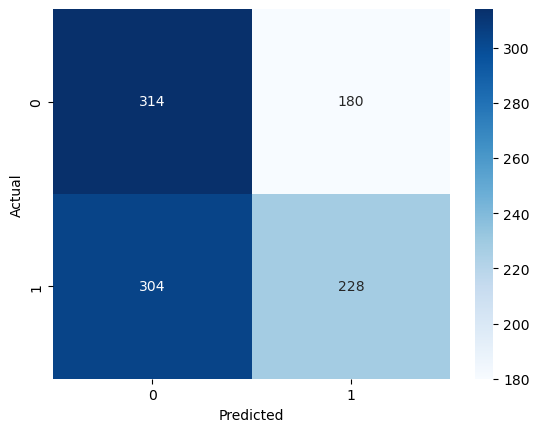

              precision    recall  f1-score   support

           0       0.51      0.64      0.56       494
           1       0.56      0.43      0.49       532

    accuracy                           0.53      1026
   macro avg       0.53      0.53      0.52      1026
weighted avg       0.53      0.53      0.52      1026



In [161]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

### Type of customers: DecisionTree

In [162]:
df_dt = df_cleaned

In [163]:
df_dt = df_cleaned[['hotel','lead_time','arrival_date_year','arrival_date_month','arrival_date_day_of_month','stays_in_weekend_nights','customer_type','stays_in_week_nights','adults','babies','num_children','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','booking_changes','deposit_type','adr','required_car_parking_spaces']]

In [164]:
# add new "family" column based on conditions
df_dt['family'] = ((df_dt['babies'] + df_dt['num_children'] > 0) & (df_dt['adults'] > 0)).astype(int)

C:\Users\Rohith Ramichetty\AppData\Local\Temp\ipykernel_4908\3644951496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt['family'] = ((df_dt['babies'] + df_dt['num_children'] > 0) & (df_dt['adults'] > 0)).astype(int)


In [165]:
df_dt['family'].unique()

array([0, 1])

In [166]:
y=df_dt['family']
x = df_dt.drop('family', axis = 1)
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:1.0
f1_score:1.0
precision:1.0
recall:1.0


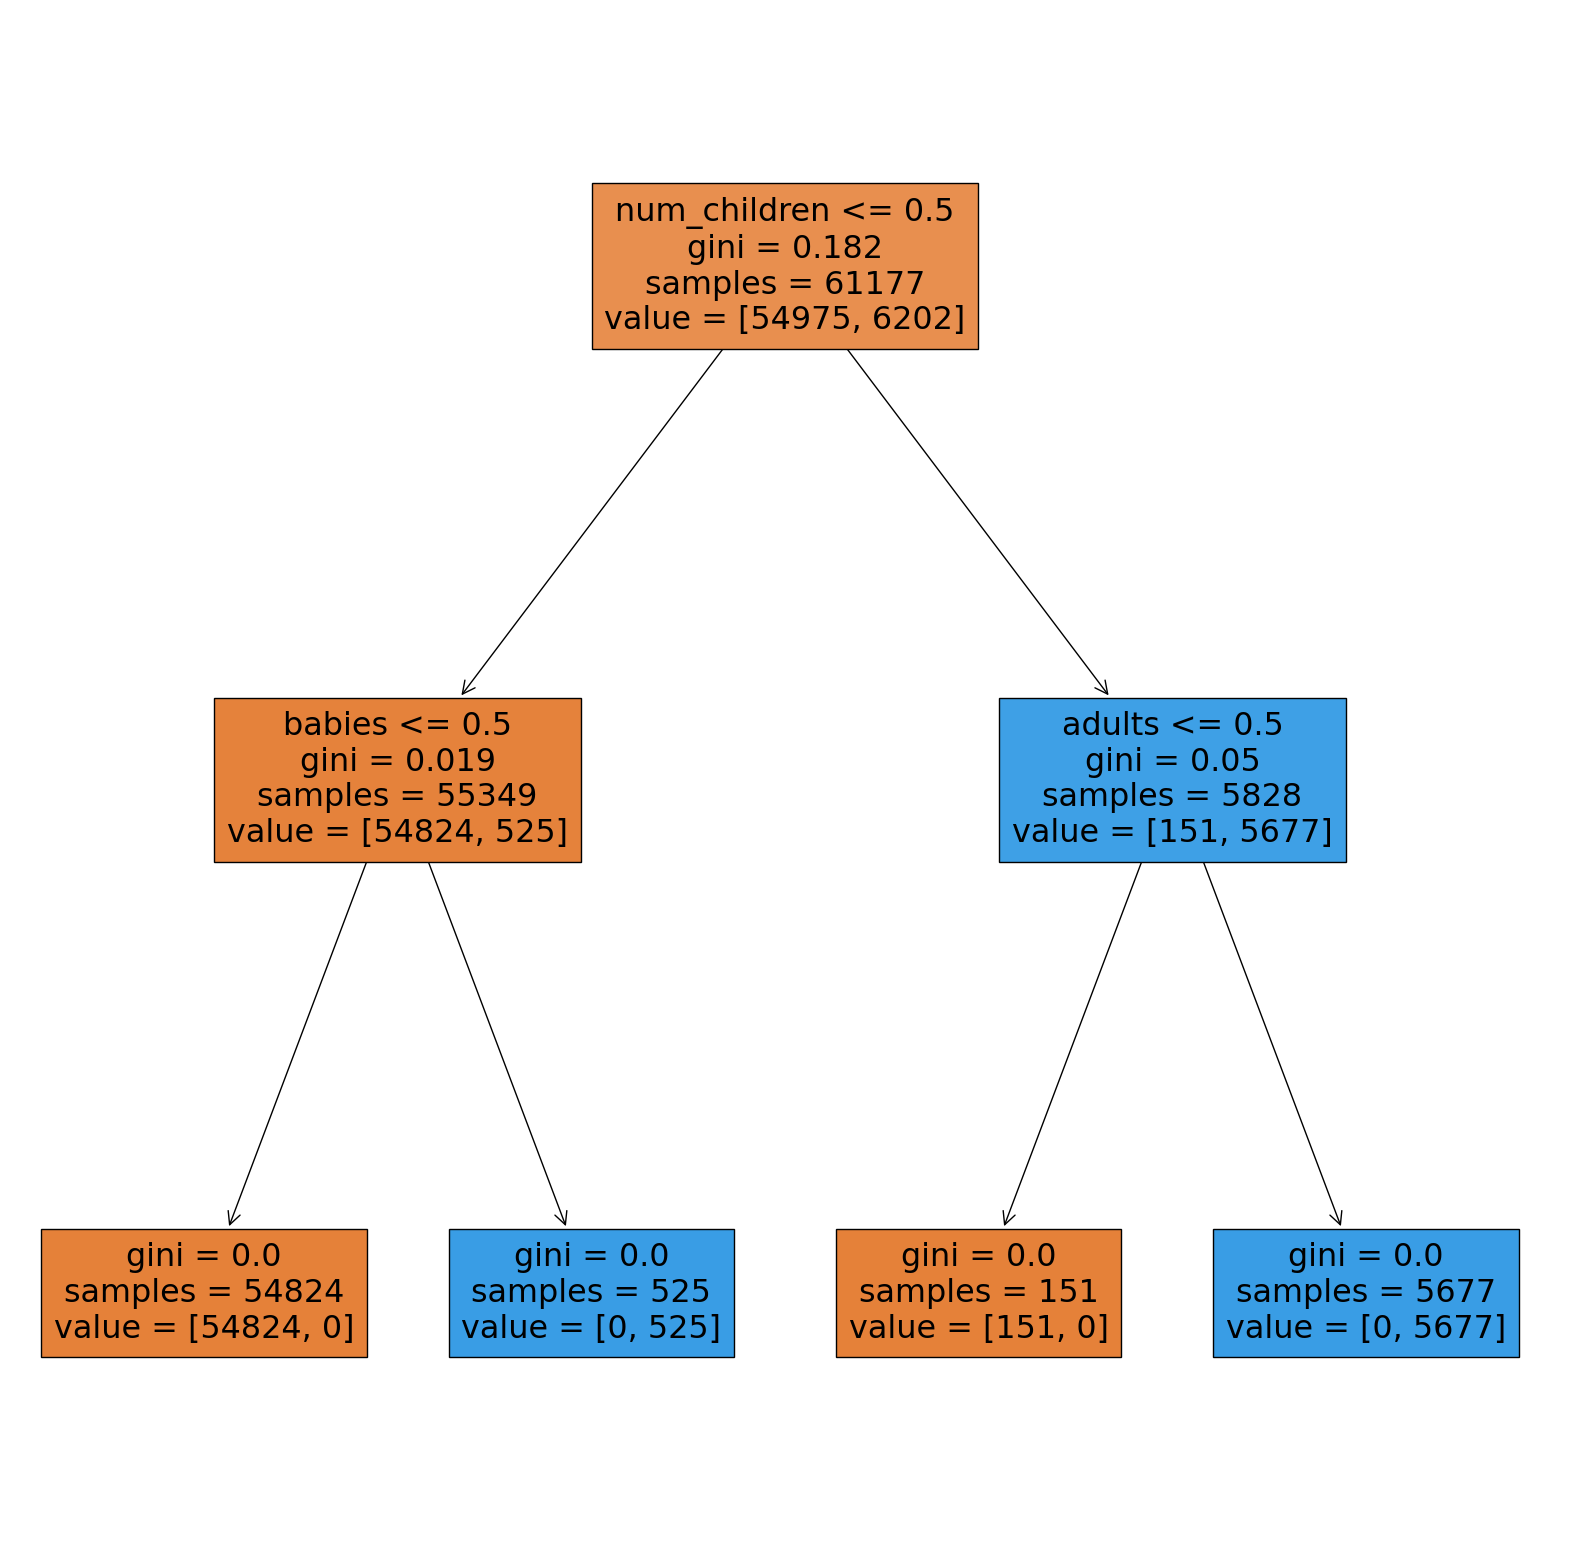

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=x.columns, filled=True)
plt.show()


### Monthly popularity: Adaboost

In [169]:
df_dt = df_cleaned[['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']]

In [170]:
y=df_dt['hotel']
x = df_dt.drop('hotel', axis = 1)
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [171]:
from sklearn.ensemble import AdaBoostClassifier


In [172]:
# Create a Decision Tree Classifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with 50 estimators
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
ada.fit(x_train, y_train)

# Predict labels for the testing data
y_pred = ada.predict(X_test)

# Calculate evaluation metrics for the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6252717494946413
F1 Score: 0.20089467263115085
Precision: 0.5563063063063063
Recall: 0.12258064516129032


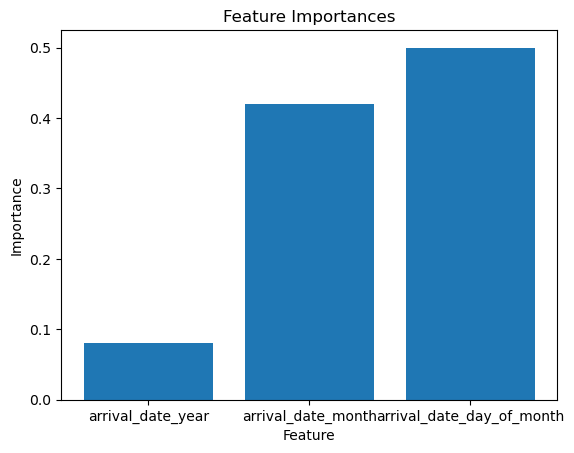

In [173]:
# Create a bar plot of feature importances
feature_importances = ada.feature_importances_
features = x_train.columns
plt.bar(features, feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
